# Febbraio  2018
## Esercizio 0
$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B|A) P(A)}{P(B)}$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as st

## Esercizio 1
### 1.1
$$D_X = (0,1)$$
### 1.2
$$P(X \leq 0.5) = (1-p)$$

### 1.3
$$Var(X) \leq \frac{1}{4}$$
$Var(X) = p - p^2$

Facendo lo studio di funzione notiamo che nel max ho $p = \frac{1}{2}$ quindi nel punto massimo $Var(X) = \frac{1}{2}-\frac{1}{4} = \frac{1}{4}$
### 1.4
$\overline{X} = \frac{1}{n} \sum X_i$ non distorto per p poichè la media campionaria è sempre uno stimatore non distorto.

$E[\frac{1}{n}\sum X_i] = \frac{1}{n}\sum E[X_i] = \frac{n}{n} E[X] = E(X) = p$

### 1.5

$$P(|T_n - p| \leq \epsilon) \geq 1 - \delta$$
$$\delta \geq \frac{1}{4n\epsilon^2}$$

Per Chebyshev

$P(|T_n - p| > \epsilon) \geq \frac{Var(T_n)}{\epsilon^2}$

$P(|T_n - p| < \epsilon) \leq 1- \frac{Var(T_n)}{\epsilon^2}$

$1-\frac{Var(X)}{\epsilon^2} = 1 - \frac{(1-p)p}{n\epsilon^2}$ poichè $Var(T_n) = \frac{Var(X)}{n}$

Nel valore max abbiamo dimostrato che $Var(X) = \frac{1}{4}$ quindi
$= 1- \frac{1}{4n\epsilon^2}$

Tornando all'espressione iniziale

$P(|T_n - p| < \epsilon) \leq 1- \frac{1}{4n\epsilon^2} \leq 1 -\delta$
quindi l'espressione è verificata

### 1.6
Grafico
### 1.7
$$P(|Y-np|\leq 1.5)$$

Standardizzo: $Y^* = \frac{|Y-np|}{np(1-p)}$

$$\Phi(\frac{1.5}{np(1-p)})-\Phi(-\frac{1.5}{np(1-p)})$$

$$\Phi(\frac{1.5}{37*0.35(0.65)})) = \Phi(8.4175)$$

$Z(np,np)$
$$P(|Z-np|\leq 1.5)$$
$P(-1.5+np < Z < 1.5+np)$

$$\Phi(\frac{1.5+np}{np(1-p)})-\Phi(\frac{-1.5+np}{np(1-p)})$$

$$\Phi(\frac{1.5}{37*0.35(0.65)})) = \Phi(8.4175)$$

In [2]:
Y = st.norm()
n = 47
sigma = 37*0.35*0.65
y1 = 1.5/sigma
Y.cdf(y1)-Y.cdf(-y1)

0.1414342302202134

In [3]:
p=0.35
Z =st.norm()
z1 = (1.5 + (27*0.35))/sigma
Z.cdf(z1)-Z.cdf(-z1)

0.8066940654195229

### Esercizio 2

In [4]:
pesca = pd.read_csv('pesca.csv', sep=',', decimal='.')
pesca.columns

Index(['giorno.settimana', 'peso.pescato', 'settore.di.pesca', 'settore.num',
       'forza.del.mare', 'tempesta'],
      dtype='object')

### 2.1

In [5]:
len(pesca['giorno.settimana'].unique())
#print("le giornate lavorative sono 5")

5

## 2.2

In [6]:
len(pesca['giorno.settimana'])

255

### 2.3

In [7]:
print("frequenza assoluta:")
fr = len(pesca[pesca['tempesta']==1])
print(fr)
print("freq relativa")
print(fr/len(pesca))

frequenza assoluta:
94
freq relativa
0.3686274509803922


### 2.4

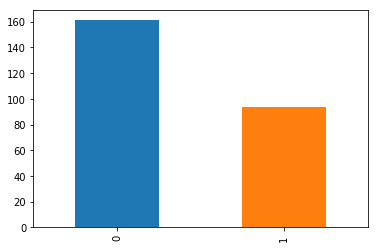

In [8]:
pesca['tempesta'].value_counts().plot.bar()
plt.show()

### 2.5

In [9]:
len(pesca['settore.di.pesca'].unique())

9

### 2.6

In [10]:
fres = pesca["settore.di.pesca"].value_counts(normalize = True)
mask = fres.index == "A"
fres[mask]

A    0.145098
Name: settore.di.pesca, dtype: float64

### 2.7

In [11]:
pd.crosstab(pesca["settore.di.pesca"], pesca["tempesta"])

tempesta           0   1
settore.di.pesca        
A                 24  13
B                 28  24
C                 19  14
D                  3   2
E                 24  16
F                  5   3
G                 20  11
H                  8   1
I                 30  10

### 2.8

In [12]:
frea = pd.crosstab(pesca["settore.di.pesca"], pesca["tempesta"])
mask = frea.index == "A"
frea[mask]

tempesta           0   1
settore.di.pesca        
A                 24  13

### 2.9

In [13]:
(pesca["tempesta"].mean())

0.3686274509803922

### 2.10

In [14]:
len(pesca["tempesta"])

255

### 2.11

In [15]:
setta = pesca[pesca["settore.di.pesca"] == "A"]
setta["tempesta"].mean()

0.35135135135135137

### 2.12
$$P(A|T = 1) = \frac{P(A \cap T = 1)}{P(T=1)}$$

In [16]:
setta["tempesta"].mean()/pesca['tempesta'].mean()

0.9531339850488787

### 2.13

In [17]:
len(setta.dropna())

37

### 2.14
n = 37
$$P(|p_{TA} -p | \leq 0.1 ) > 1 - \frac{Var(X)}{n*(0.1)^2}$$
Per il punto precedente so che n = 37

In [18]:
pta = setta["tempesta"].mean()
var = setta["tempesta"].var()
1-(var/(37*(0.1)**2))

0.36693450206963685

### Esercizio 3

### 3.1

In [19]:
pesca['peso.pescato']
print("continuo")

continuo


### 3.2

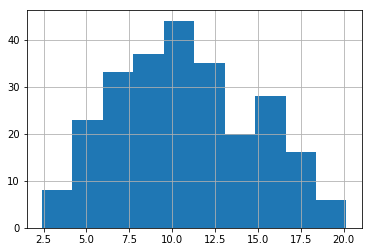

In [20]:
pesca['peso.pescato'].hist()
plt.show()

### 3.3

In [21]:
mask1 = pesca['peso.pescato'] > 10
mask2 = pesca['peso.pescato'] < 15
pp = pesca[mask1 & mask2]
len(pp['giorno.settimana'])/len(pesca['giorno.settimana']) * 100

37.64705882352941

### 3.4

In [22]:
print(pesca["peso.pescato"].var())
print(pesca["peso.pescato"].mean())

16.09024449815005
10.788632531936003


### 3.5

In [23]:
from scipy.stats import norm
X = norm(loc = 10.78, scale = 4)
z = X.cdf(10)
y = X.cdf(15)
y-z

0.431590863816581

### 3.6

In [24]:
print("Si possono confrontare perchè 3.5 è un approssimazione")

Si possono confrontare perchè 3.5 è un approssimazione


### 3.8

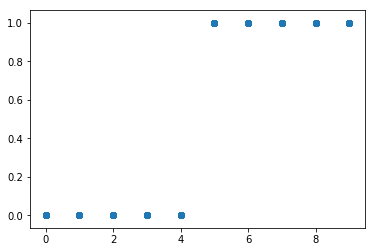

In [25]:
plt.scatter(pesca['forza.del.mare'],pesca['tempesta'])
plt.show()

### 3.9

In [26]:
print("tra [0,4] non ho tempesta, poi si")

tra [0,4] non ho tempesta, poi si


### 3.10
No

In [27]:
pesca['forza.del.mare'].corr(pesca['tempesta'])

0.8412359096077446

### 3.11

In [28]:
dati_senza_NA = pesca.dropna()
dati_senza_NA["peso.pescato"].std()/dati_senza_NA["peso.pescato"].mean()

0.37180473880354103